<a href="https://colab.research.google.com/github/tejatanush/Traffic_Sign_Detection/blob/main/traffic_sign_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Description:**

Developed a model for traffic sign detection using various signs on road which helps for self driving cars to follow driving rules and provide a safe journey.This model is trained using nearly 100,000 images having 43 different classes.

# 1. Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [8]:
! pip install kaggle

# 2.Import Dataset

Upload json file from kaggle which is an API file provided by kaggle so that any kaggle dataset can be downloaded using dataset API into colab.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"tejatanush","key":"3ed3ac94dccf71463b6a2d018fe18c37"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download dataset from kaggle. This dataset is in zip format having train,test,meta files with images and csv files for that folders respectively.

# Reference:
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign




In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 96% 587M/612M [00:11<00:00, 66.3MB/s]
100% 612M/612M [00:12<00:00, 53.3MB/s]


#Unzip dataset folder

In [6]:
#!unzip gtsrb-german-traffic-sign.zip

Archive:  gtsrb-german-traffic-sign.zip
replace Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Meta.csv                
replace Meta/.~lock.ClassesInformation.ods#? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Meta/.~lock.ClassesInformation.ods#  
replace Meta/.~lock.ClassesInformationStrong.ods#? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Meta/.~lock.ClassesInformationStrong.ods#  
replace Meta/0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Meta/0.png              
replace Meta/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Meta/1.png              
replace Meta/10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Meta/10.png             
replace Meta/11.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Meta/11.png             
replace Meta/12.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Meta/12.png             
replace Meta/13.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Meta/13.png  

# 3.Preprocess Data

In [9]:
import os
from PIL import Image
imgs_path = "/content/train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

# 4. Visualize Data

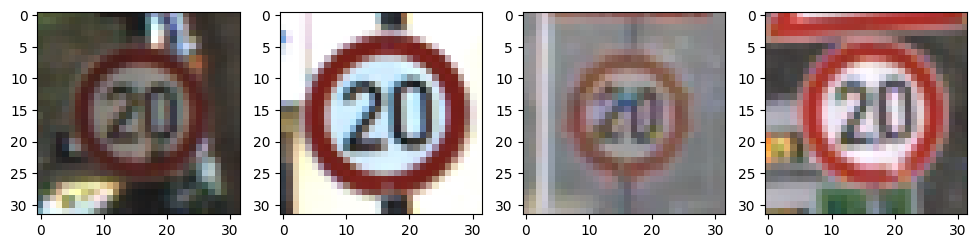

In [10]:
plt.figure(figsize = (12,12))

for i in range(4) :
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

# 5.Split Data in to X and Y
As our folder test and meta do not have directories and only images are provided along with csv files so lets split train set to validation and test set also.

In [11]:
import seaborn as sns
from PIL import Image

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import os
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

# 6.Split Data into Train and Test sets

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

# 7.Build a model

**Create Model:** As traffic signs are images and we need to classify them let's go with deep learning and use Convolution Nueral Network (CNN). Let's build our model with a sequence of layer Conv2D,Maxpool2D and then we use batch normalization so that every time our model results will normalized which leads to good results. We can also use dropout to prevent overfit.At last we use Dense layer and a softmax function to classify one class from 43 different classes.

In [14]:
model=models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',strides=(1,1),input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu',padding='same',strides=(1,1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same',strides=(1,1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same',strides=(1,1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())

model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(1000,activation='relu'))

model.add(layers.Dense(43,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 2, 2, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4000)                │       8,196,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4000)                │      16,004,000 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 28,930,571 (110.36 MB)

 Trainable params: 28,929,099 (110.36 MB)

 Non-trainable params: 1,472 (5.75 KB)

**Compile Model:** As we are working on lassification we can use Adam as optimizer and loss function as CategoricalCrossentropy. To evaluate perfomance of our model we can use Accuracy as metric.

In [17]:
model.compile(optimizer='Adam',loss='CategoricalCrossentropy',metrics=['Accuracy'])

**Fit Model:** Lets fit and train our model to 30 epochs and X_val and Y_val as validation data.

In [18]:
model_hist=model.fit(X_train,Y_train,epochs=30,validation_data=(X_val,Y_val))

Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - Accuracy: 0.3503 - loss: 2.4304 - val_Accuracy: 0.7455 - val_loss: 0.9402
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - Accuracy: 0.8500 - loss: 0.4861 - val_Accuracy: 0.9319 - val_loss: 0.2249
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - Accuracy: 0.9173 - loss: 0.2770 - val_Accuracy: 0.9758 - val_loss: 0.0729
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - Accuracy: 0.9420 - loss: 0.2084 - val_Accuracy: 0.9763 - val_loss: 0.0898
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - Accuracy: 0.9498 - loss: 0.1907 - val_Accuracy: 0.9880 - val_loss: 0.0490
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - Accuracy: 0.9610 - loss: 0.1561 - val_Accuracy: 0.9903 - val_loss: 0.0408
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - Accuracy: 0.9629 - loss: 0.1498 - val_Accuracy: 0.9857 - val_loss: 0.0496
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - Accuracy: 0.9646 - loss: 0.1471 - 

We see that our results are very good.

**Accuracy: 0.9845**

**Validation Accuracy: 99.62**

#9. Prediction of test dataset

Let's Evaluate our model with X_test and Y_test.

In [23]:
evaluate=model.evaluate(X_test,Y_test)

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.9950 - loss: 0.0259


We obtained a result of **99.5%** accuracy

Predict X_test and observe any of the result which is in array form.

In [20]:
prediction=model.predict(X_test)
print(prediction[1])

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[0.0000000e+00 0.0000000e+00 1.0696251e-40 1.6107134e-37 0.0000000e+00
 6.8630274e-40 0.0000000e+00 1.0369665e-39 1.9197789e-43 1.0000000e+00
 5.3598376e-27 0.0000000e+00 4.4947067e-35 6.3058431e-44 0.0000000e+00
 6.2287717e-42 2.5883889e-28 3.9236357e-44 0.0000000e+00 1.4344037e-28
 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.2479866e-24 0.0000000e+00
 9.1451961e-40 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 3.8522255e-40 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 3.2954903e-29 2.8025969e-45]


Compare predicted labels with actual labels.

In [24]:
predicted_labels=np.argmax(prediction,axis=1)
actual_labels=np.argmax(Y_test,axis=1)
comparison_df = pd.DataFrame({
    'Predicted': predicted_labels,
    'Actual': actual_labels
})
print(comparison_df)

      Predicted  Actual
0             5       5
1             9       9
2             9       9
3            17      17
4            25      25
...         ...     ...
3916          3       3
3917          4       4
3918         41      41
3919          9       9
3920          9       9

[3921 rows x 2 columns]


It seeems almost predicted and actual results are same.

# 10. Predict and Visualize test data

We have more than 12,000 images in test dataset so lets take only random 5 images and predict the result.

In [47]:
test_data=pd.read_csv('Test.csv',usecols=['ClassId','Path'])
test_data=test_data.sample(n=5,random_state=42)
base_path='/content/'
test_data['Path']=test_data['Path'].apply(lambda x:os.path.join(base_path,x))
test_data = test_data.reset_index(drop=True)
test_data


,ClassId,Path
0,2,/content/Test/08904.png
1,10,/content/Test/11635.png
2,11,/content/Test/04308.png
3,4,/content/Test/11402.png
4,12,/content/Test/08111.png


Function for visulaization

In [50]:
import cv2
def plot_images(df,model):
  plt.figure(figsize=(15,10))
  for i in range(len(df)):
    img=cv2.imread(df['Path'][i])
    img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_resized=cv2.resize(img_rgb,(32,32))
    img_array=np.expand_dims(img_resized,axis=0)
    predicted_class=np.argmax(model.predict(img_array),axis=1)[0]
    plt.subplot(1,5,i+1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Actual: {df['ClassId'][i]}, Predicted: {predicted_class}")
  plt.show()


Images with predicted and actual labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


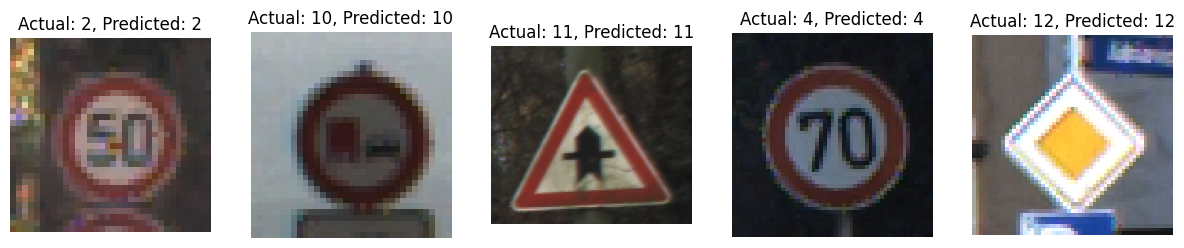

In [51]:
 plot_images(test_data,model)

We can see that all images are predicted with correct labels. Hence our model performs very well without any overfitting.